In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Upload file kaggle.json untuk akses dataset
from google.colab import files
files.upload()  # unggah kaggle.json Anda di sini

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lucascha","key":"6ee5fce662be883e09df2bfb406e4795"}'}

In [ ]:
os.makedirs('/root/.kaggle', exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
#Download dataset dari Kaggle
!kaggle datasets download -d anasfikrihanif/indonesian-food-and-drink-nutrition-dataset
# Ekstrak file zip
!unzip -o indonesian-food-and-drink-nutrition-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/anasfikrihanif/indonesian-food-and-drink-nutrition-dataset
License(s): CC0-1.0
Archive:  indonesian-food-and-drink-nutrition-dataset.zip
  inflating: nutrition.csv           


In [ ]:
df = pd.read_csv('nutrition.csv')
print("Jumlah data awal:", len(df))
df.head()

Jumlah data awal: 1346


,id,calories,proteins,fat,carbohydrate,name,image
0,1,280.0,9.2,28.4,0.0,Abon,https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...
1,2,513.0,23.7,37.0,21.3,Abon haruwan,https://img-global.cpcdn.com/recipes/cbf330fbd...
2,3,0.0,0.0,0.2,0.0,Agar-agar,https://res.cloudinary.com/dk0z4ums3/image/upl...
3,4,45.0,1.1,0.4,10.8,Akar tonjong segar,https://images.tokopedia.net/img/cache/200-squ...
4,5,37.0,4.4,0.5,3.8,Aletoge segar,https://nilaigizi.com/assets/images/produk/pro...


In [ ]:
# Langkah 4: Preprocessing
df = df.dropna(subset=['calories', 'proteins', 'fat', 'carbohydrate'])

for col in ['calories', 'proteins', 'fat', 'carbohydrate']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
def klasifikasi(row):
    kalori = row['calories']
    lemak = row['fat']
    karbo = row['carbohydrate']
    protein = row['proteins']

    tinggi_count = sum([
        kalori > 300,
        lemak > 15,
        karbo > 30,
        protein > 15
    ])
    sedang_count = sum([
        150 <= kalori <= 350,
        5 <= lemak <= 15,
        15 <= karbo <= 30,
        5 <= protein <= 15
    ])

    # Kategori khusus
    if protein > 15 and tinggi_count < 2:
        return 'Tinggi Protein'
    if kalori < 150 and lemak < 5 and karbo < 20:
        return 'Cemilan Ringan'

    # Kategori utama
    if kalori < 200 and lemak < 10 and karbo < 20 and protein >= 5:
        return 'Sehat'
    if tinggi_count >= 2:
        return 'Tinggi Energi'
    if sedang_count >= 3:
        return 'Bergizi'

    return 'Lainnya'


# Terapkan fungsi baru ke DataFrame
df['kategori_makanan'] = df.apply(klasifikasi, axis=1)

In [ ]:
# Terapkan fungsi baru ke DataFrame
df['kategori_makanan'] = df.apply(klasifikasi, axis=1)

In [ ]:
# Tampilkan hasil distribusi baru
print("Distribusi Kategori (Revisi):")
print(df['kategori_makanan'].value_counts())

Distribusi Kategori (Revisi):
kategori_makanan
Cemilan Ringan    422
Tinggi Energi     414
Lainnya           268
Tinggi Protein    161
Bergizi            44
Sehat              37
Name: count, dtype: int64


<ipython-input-10-c1b1b72aa7c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='kategori_makanan', data=df, palette='pastel')


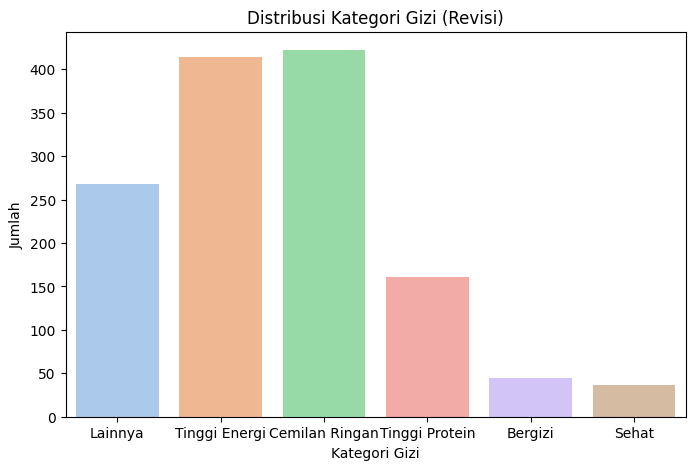

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='kategori_makanan', data=df, palette='pastel')
plt.title("Distribusi Kategori Gizi (Revisi)")
plt.xlabel("Kategori Gizi")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
df.head()

,id,calories,proteins,fat,carbohydrate,name,image,kategori_makanan
0,1,280.0,9.2,28.4,0.0,Abon,https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...,Lainnya
1,2,513.0,23.7,37.0,21.3,Abon haruwan,https://img-global.cpcdn.com/recipes/cbf330fbd...,Tinggi Energi
2,3,0.0,0.0,0.2,0.0,Agar-agar,https://res.cloudinary.com/dk0z4ums3/image/upl...,Cemilan Ringan
3,4,45.0,1.1,0.4,10.8,Akar tonjong segar,https://images.tokopedia.net/img/cache/200-squ...,Cemilan Ringan
4,5,37.0,4.4,0.5,3.8,Aletoge segar,https://nilaigizi.com/assets/images/produk/pro...,Cemilan Ringan


In [ ]:
# (Opsional) Simpan hasil ke CSV
df.to_csv("indonesian_food_with_nutrition_category.csv", index=False)